<a href="https://colab.research.google.com/github/fernando12170209/Machine_learning_basico/blob/master/RegresionLogistica_enKeras/RegresionLogistica_enKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving dataset.csv to dataset (5).csv
    Horas de estudio  Horas de sueno  Categoria
0           4.855064        9.639962          1
1           8.625440        0.058927          0
2           3.828192        0.723199          0
3           7.150955        3.899420          1
4           6.477900        8.198181          1
..               ...             ...        ...
95          0.022280        2.658428          0
96          7.630637        7.405351          1
97          3.684997        5.049965          0
98          7.484260        6.059396          1
99          2.030708        3.937267          0

[100 rows x 3 columns]


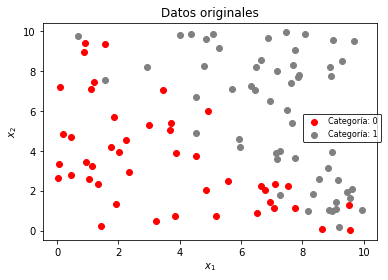

Epoch 1/1000
1/1 - 0s - loss: 1.4958 - accuracy: 0.3300
Epoch 2/1000
1/1 - 0s - loss: 1.2458 - accuracy: 0.5500
Epoch 3/1000
1/1 - 0s - loss: 0.7076 - accuracy: 0.5300
Epoch 4/1000
1/1 - 0s - loss: 0.6438 - accuracy: 0.5500
Epoch 5/1000
1/1 - 0s - loss: 0.6247 - accuracy: 0.5500
Epoch 6/1000
1/1 - 0s - loss: 0.6243 - accuracy: 0.5500
Epoch 7/1000
1/1 - 0s - loss: 0.6330 - accuracy: 0.7100
Epoch 8/1000
1/1 - 0s - loss: 0.6718 - accuracy: 0.5500
Epoch 9/1000
1/1 - 0s - loss: 0.6846 - accuracy: 0.5200
Epoch 10/1000
1/1 - 0s - loss: 0.8008 - accuracy: 0.5500
Epoch 11/1000
1/1 - 0s - loss: 0.6876 - accuracy: 0.5100
Epoch 12/1000
1/1 - 0s - loss: 0.8109 - accuracy: 0.5500
Epoch 13/1000
1/1 - 0s - loss: 0.6758 - accuracy: 0.5300
Epoch 14/1000
1/1 - 0s - loss: 0.7906 - accuracy: 0.5500
Epoch 15/1000
1/1 - 0s - loss: 0.6721 - accuracy: 0.5300
Epoch 16/1000
1/1 - 0s - loss: 0.7874 - accuracy: 0.5500
Epoch 17/1000
1/1 - 0s - loss: 0.6644 - accuracy: 0.5700
Epoch 18/1000
1/1 - 0s - loss: 0.7758 - 

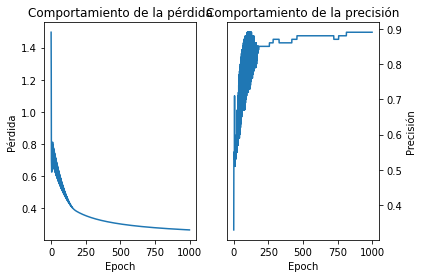

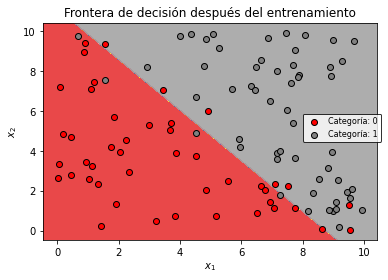

In [6]:
# Set de datos: estudiantes que aprobaron (1) o reprobaron (0) el examen
# con base en el número de horas estudiadas (x1) y el número de horas
# de sueño (x2)
# 
# codificandobits.com - 2018

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#
# Leer el dataset y dibujar la nube de puntos con categorías
#
#
#Para cargar los archivos desde la plataforma, ver archivo en github

from google.colab import files
file = files.upload()
#
datos = pd.read_csv('dataset.csv', sep=",")
print(datos)

# Crear datos de entrenamiento (X) y categorías de salida (Y). X: las
# dos primeras columnas, Y: la tercera columna

X = datos.values[:,0:2]
Y = datos.values[:,2]

# Graficar
idx0 = np.where(Y==0)
idx1 = np.where(Y==1)

plt.scatter(X[idx0,0],X[idx0,1],color='red',label='Categoría: 0')
plt.scatter(X[idx1,0],X[idx1,1],color='gray',label='Categoría: 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(bbox_to_anchor=(0.765,0.6),fontsize=8,edgecolor='black')
plt.title('Datos originales')
plt.show()

#
# Crear el modelo en Keras
#

# - input_dim: 2, pues cada dato tiene 2 características (x1 y x2)
# - output_dim: 1, pues se tiene una de dos posibles categorías (0 ó 1)
# - Activación: sigmoidal

np.random.seed(1)       # para reproducibilidad
input_dim = X.shape[1]
output_dim = 1                          

modelo = Sequential()
modelo.add(Dense(output_dim, input_dim = input_dim, activation='sigmoid'))

# Optimización: se usará gradiente descendente (SGD) con lr=0.2, función de error entropía
# cruzada (binary_crossentropy), métrica para el desempeño: accuracy (precisión)
#binary_crossentropy es la funcion de para Regresion Logistica

#Para medir el desempeño del modelo:metrics=['accuracy']

sgd = SGD(lr=0.2)
modelo.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

#
# Entrenamiento
#

num_epochs = 1000
batch_size = X.shape[0] #Cantodad de elementos que vamos  a presentar en cada entrenamiento
historia = modelo.fit(X, Y, epochs=num_epochs, batch_size=batch_size, verbose=2)

# Graficar comportamiento de la pérdida y de la precisión
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.title('Comportamiento de la pérdida')

plt.subplot(1,2,2)
#plt.plot(historia.history['acc'])
plt.plot(historia.history['accuracy'])
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.title('Comportamiento de la precisión')

ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

plt.show()

#
# Graficar frontera de decisión
#

def dibujar_frontera(X,Y,modelo,titulo):
    # Valor mínimo y máximo y rellenado con ceros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Grilla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir categorías para cada punto en la gruilla
    Z = modelo.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    #Debido al warming
    #Z=np.argmax(modelo.predict(X), axis=-1)
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    idx0 = np.where(Y==0)
    idx1 = np.where(Y==1)
    plt.scatter(X[idx0,0],X[idx0,1],color='red', edgecolor='k', label='Categoría: 0')
    plt.scatter(X[idx1,0],X[idx1,1],color='gray',edgecolor='k', label='Categoría: 1')
    plt.legend(bbox_to_anchor=(0.765,0.6),fontsize=8,edgecolor='black')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titulo)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

dibujar_frontera(X,Y,modelo,'Frontera de decisión después del entrenamiento')